In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from matplotlib.font_manager import FontProperties

In [16]:
# 数据加载，避免中文乱码GBK
data_ori = pd.read_csv('./heros.csv', encoding='GBK')
features = ['最大生命', '生命成长', '初始生命', '最大法力', '法力成长', '初始法力', '最高物攻', '物攻成长', '初始物攻', '最大物防',
            '物防成长', '初始物防', '最大每5秒回血', '每5秒回血成长', '初始每5秒回血', '最大每5秒回蓝', '每5秒回蓝成长', '初始每5秒回蓝', '最大攻速', '攻击范围']
data = data_ori[features]

In [17]:
# 对英雄属性之间的关系进行可视化分析
# 设置 plt 正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['font.family'] = 'sans-serif'

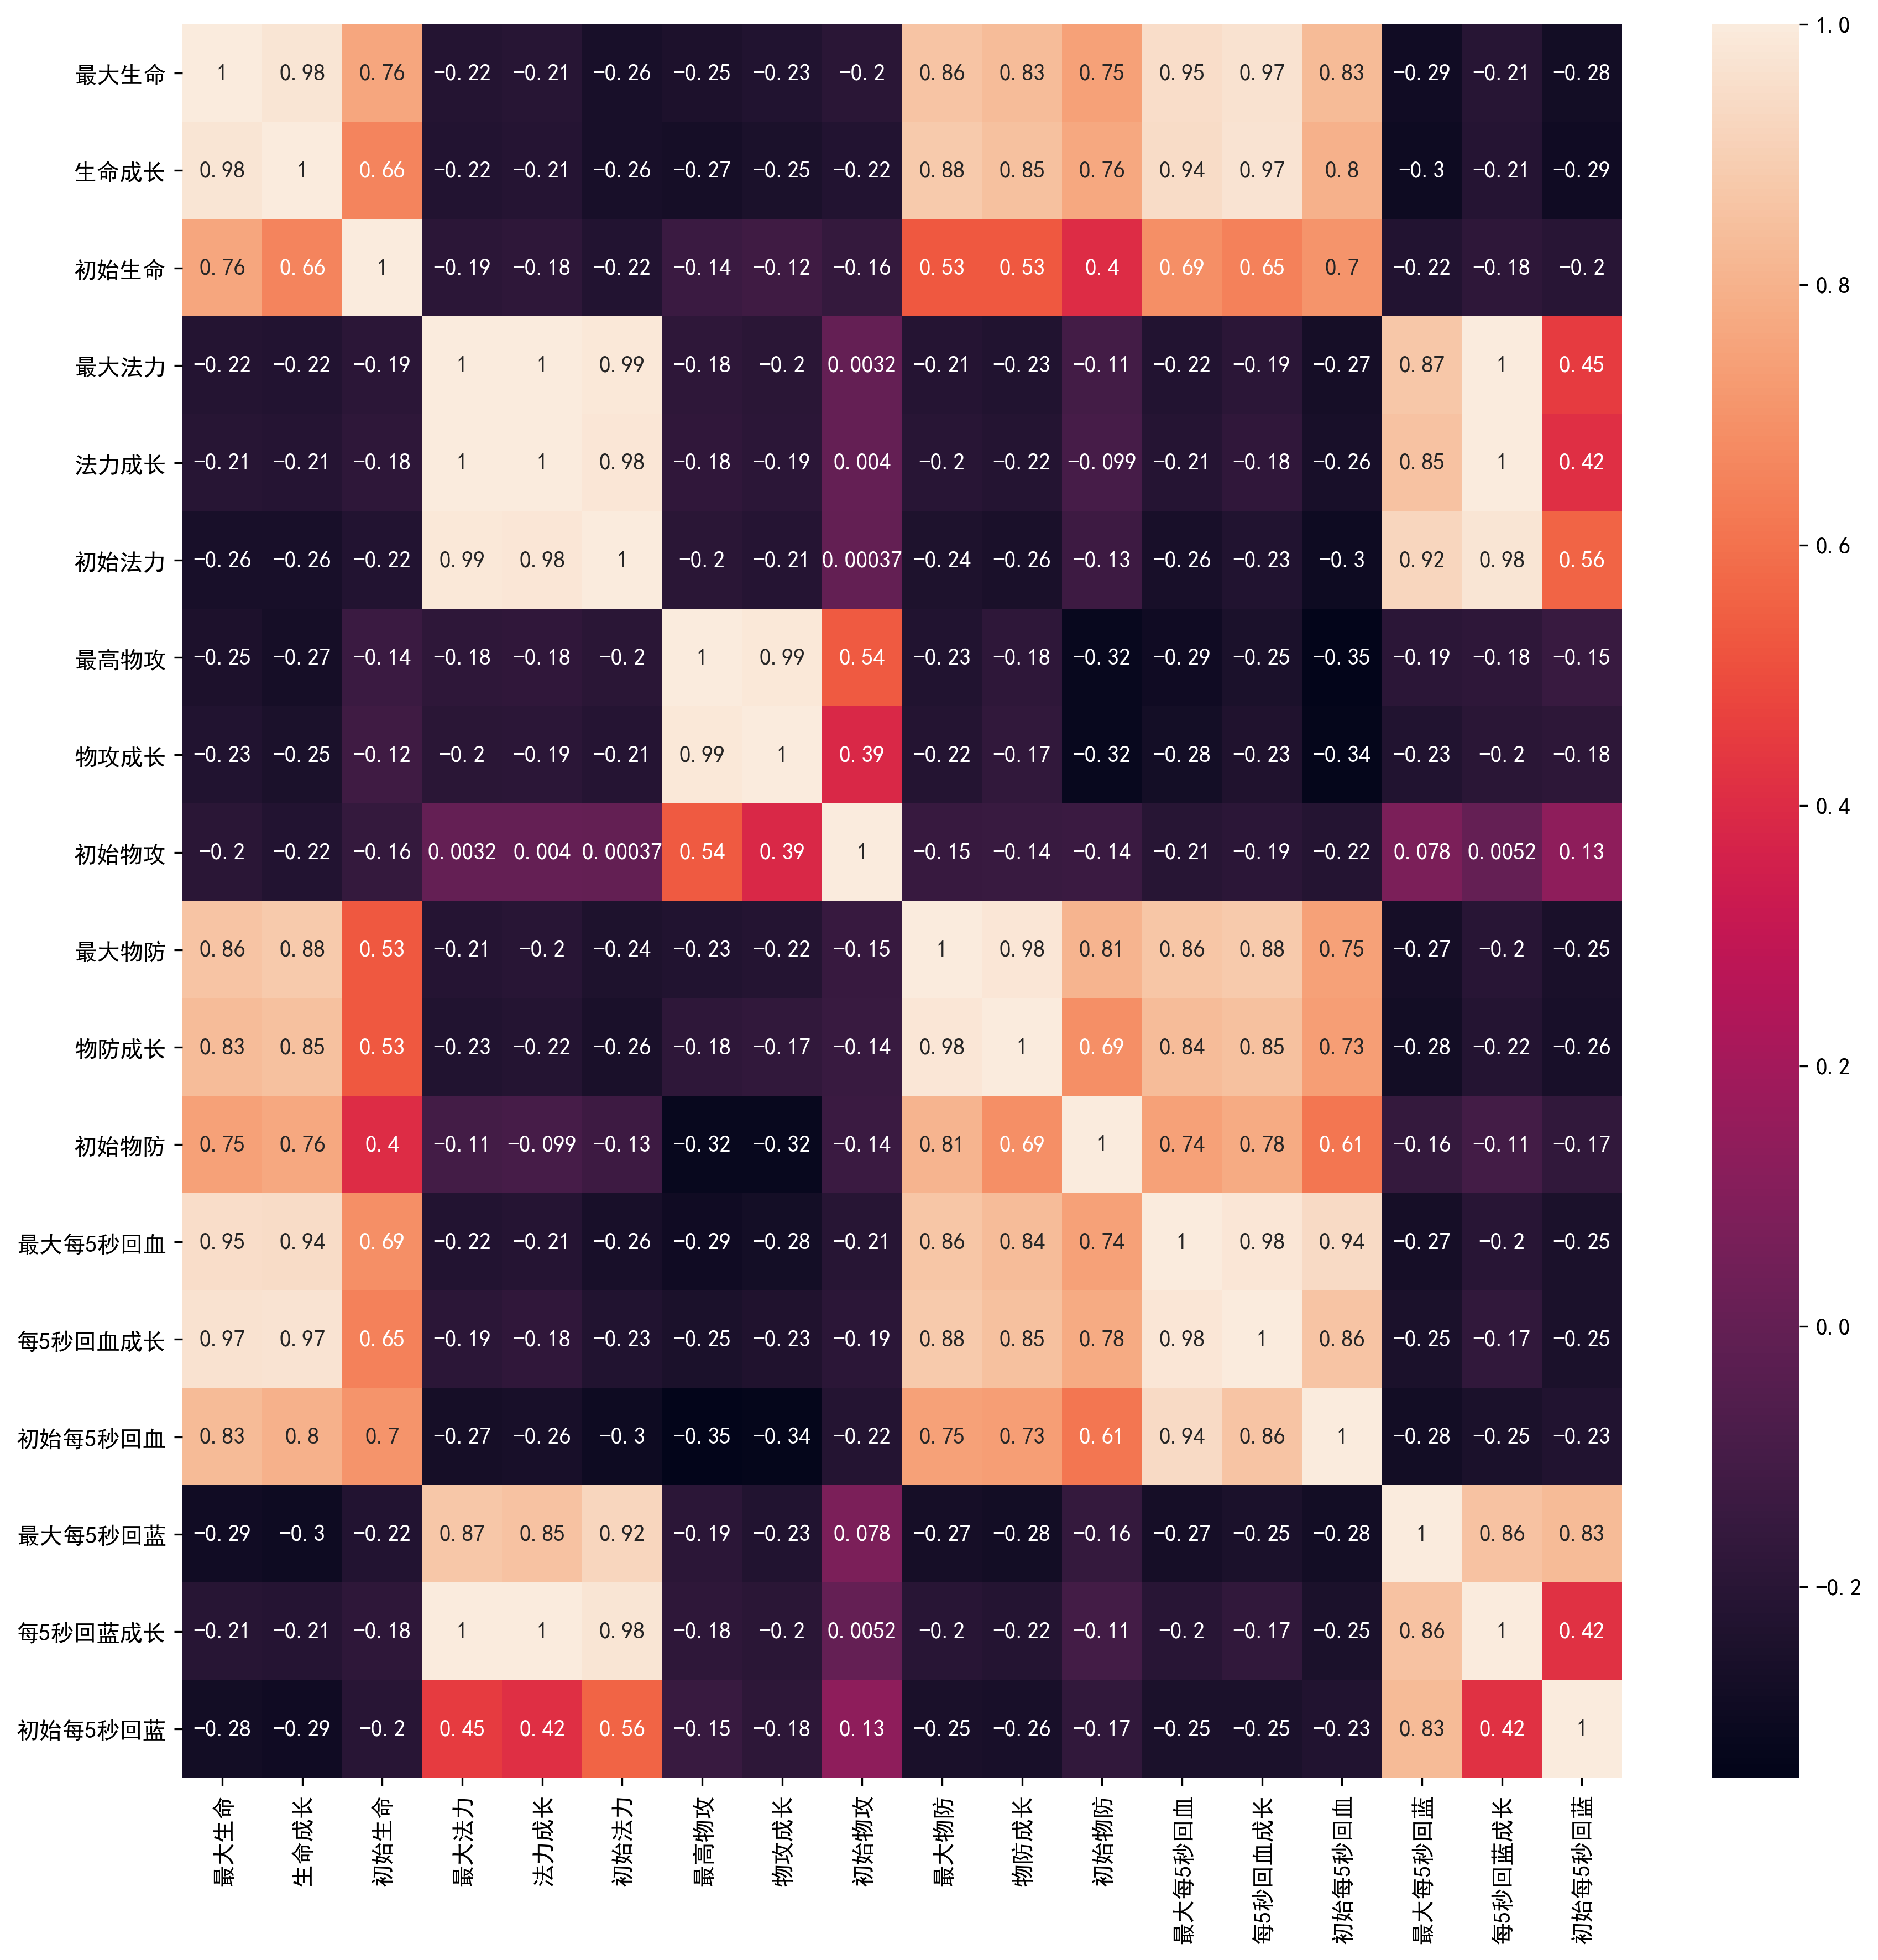

In [18]:
# 用热力图呈现 features_mean 字段之间的相关性
corr = data[features].corr()
plt.figure(figsize=(14, 14), dpi=300)
# annot=True 显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

In [19]:
# 相关性大的属性保留一个，因此可以对属性进行降维
features_remain = ['最大生命', '初始生命', '最大法力', '最高物攻', '初始物攻', '最大物防',
                   '初始物防', '最大每5秒回血', '最大每5秒回蓝', '初始每5秒回蓝', '最大攻速', '攻击范围']
data = data_ori[features_remain]
data['最大攻速'] = data['最大攻速'].apply(lambda x: float(x.strip('%')) / 100)
data['攻击范围'] = data['攻击范围'].map({'远程': 1, '近战': 0})

/Users/cool/.pyenv/versions/3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/cool/.pyenv/versions/3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# 采用 Z-Score 规范化数据，保证每个特征维度的数据均值为 0，方差为 1
ss = StandardScaler()
data = ss.fit_transform(data)

In [21]:
# 构造 GMM 聚类
gmm = GaussianMixture(n_components=30, covariance_type='full')
gmm.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=30, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [22]:
# 训练数据
prediction = gmm.predict(data)
prediction

array([ 0, 14, 11, 25,  7,  7, 21, 11, 27, 14, 10, 14, 25, 23, 22, 10, 24,
        5, 29,  8, 13, 20,  8, 20, 20, 20,  8,  1,  2, 18, 23,  2, 19,  2,
       18,  2,  2,  6,  9, 17, 19,  2,  2, 19,  2, 19, 14,  9, 14,  2,  3,
        4, 29, 16, 16,  0, 26, 14, 28,  7, 26,  3, 15,  0, 12,  4,  4,  0,
        1])

In [23]:
# 将分组结果输出到 CSV 文件中
data_ori.insert(0, '分组', prediction)
data_ori.to_csv('./hero_out.csv', index=False)

In [24]:
from sklearn.metrics import calinski_harabaz_score

In [25]:
calinski_harabaz_score(data, prediction)

/Users/cool/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


21.733179971711515

In [26]:
# 构造 GMM 聚类 3个
gmm3 = GaussianMixture(n_components=3, covariance_type='full')
gmm3.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [27]:
# 训练数据
prediction = gmm3.predict(data)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 2])

In [28]:
calinski_harabaz_score(data, prediction)

/Users/cool/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


17.390621005660297